# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [4]:
#Testing code on smaller amount of cities before running entire list
# cities=cities[:9]
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
api_format = "json"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | sawakin
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | nova sintra
Processing Record 7 of Set 1 | fale old settlement
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | nagato
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | winnemucca
Processing Record 13 of Set 1 | tinajo
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | del rio
Processing Record 20 of Set 1 | box elder
Processing Record 21 of Set 1 | enewetak
Processing Record 22 of Set 1 | isangel
Proces

Processing Record 41 of Set 4 | le port
Processing Record 42 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 43 of Set 4 | fort st. john
Processing Record 44 of Set 4 | atafu village
Processing Record 45 of Set 4 | constantia
Processing Record 46 of Set 4 | la passe
Processing Record 47 of Set 4 | sola
Processing Record 48 of Set 4 | aykhal
Processing Record 49 of Set 4 | jutai
Processing Record 0 of Set 5 | flying fish cove
Processing Record 1 of Set 5 | algona
Processing Record 2 of Set 5 | melipilla
Processing Record 3 of Set 5 | minab
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | nishinoomote
Processing Record 6 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 7 of Set 5 | ca mau
Processing Record 8 of Set 5 | kemi
Processing Record 9 of Set 5 | tabas
Processing Record 10 of Set 5 | tiksi
Processing Record 11 of Set 5 | kursenai
Processing Record 12 of Set 5 | sines
Processing Record 13 of Set 5 | magadan
Processing Rec

Processing Record 35 of Set 8 | codrington
Processing Record 36 of Set 8 | agapovka
Processing Record 37 of Set 8 | labrador city
Processing Record 38 of Set 8 | kerikeri
Processing Record 39 of Set 8 | port glaud
City not found. Skipping...
Processing Record 40 of Set 8 | villa union
Processing Record 41 of Set 8 | mersa matruh
Processing Record 42 of Set 8 | bodo
Processing Record 43 of Set 8 | minas de marcona
Processing Record 44 of Set 8 | bereznehuvate
Processing Record 45 of Set 8 | buala
Processing Record 46 of Set 8 | mazagao
Processing Record 47 of Set 8 | koungou
Processing Record 48 of Set 8 | luganville
Processing Record 49 of Set 8 | chany
Processing Record 0 of Set 9 | fuvahmulah
City not found. Skipping...
Processing Record 1 of Set 9 | matay
Processing Record 2 of Set 9 | hilo
Processing Record 3 of Set 9 | buncrana
Processing Record 4 of Set 9 | rio grande
Processing Record 5 of Set 9 | san jose del guaviare
Processing Record 6 of Set 9 | puerto baquerizo moreno
Proce

Processing Record 19 of Set 12 | caririacu
Processing Record 20 of Set 12 | siemiatycze
Processing Record 21 of Set 12 | turbat
Processing Record 22 of Set 12 | bartica
Processing Record 23 of Set 12 | taulaga
Processing Record 24 of Set 12 | bargara
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
#city_weather

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,45.91,93,100,13.80,US,1698509507
1,waitangi,-43.9535,-176.5597,48.81,83,35,5.99,NZ,1698509507
2,sawakin,19.1059,37.3321,86.25,67,22,14.12,SD,1698509508
3,port-aux-francais,-49.3500,70.2167,41.29,98,100,17.76,TF,1698509508
4,fortuna,40.5982,-124.1573,40.12,100,40,9.22,US,1698509509


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,45.91,93,100,13.80,US,1698509507
1,waitangi,-43.9535,-176.5597,48.81,83,35,5.99,NZ,1698509507
2,sawakin,19.1059,37.3321,86.25,67,22,14.12,SD,1698509508
3,port-aux-francais,-49.3500,70.2167,41.29,98,100,17.76,TF,1698509508
4,fortuna,40.5982,-124.1573,40.12,100,40,9.22,US,1698509509


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

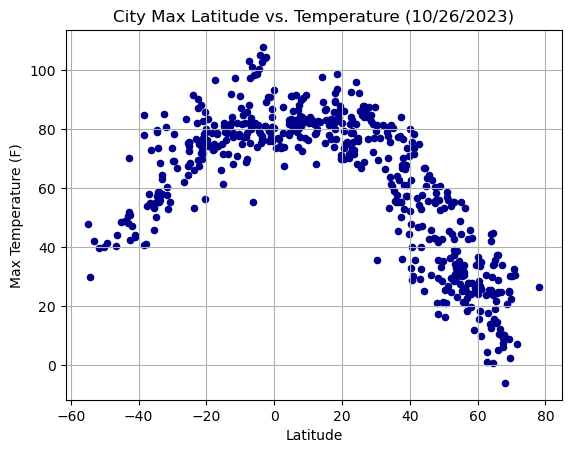

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp", c="DarkBlue", grid="axis grid lines")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (10/26/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

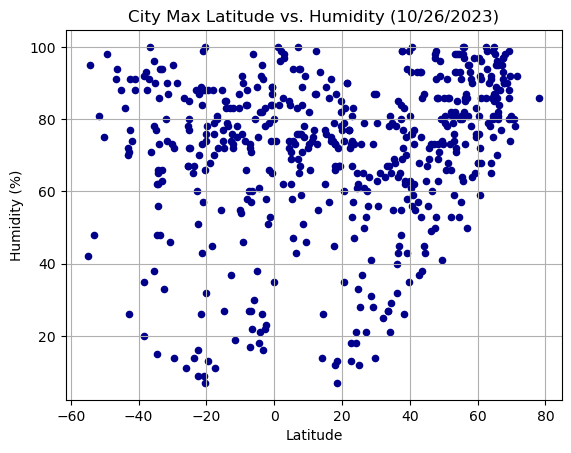

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity", c="DarkBlue", grid="axis grid lines")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (10/26/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

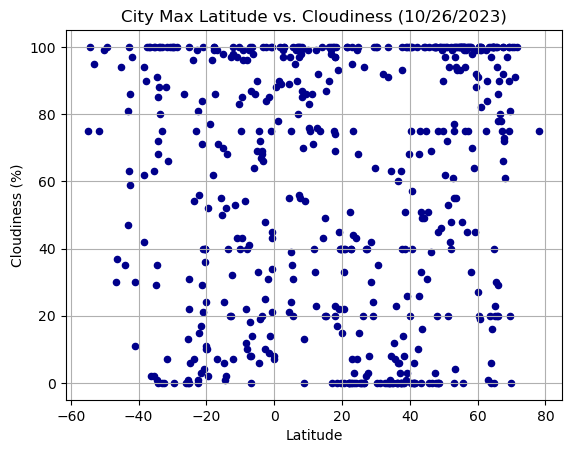

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness", c="DarkBlue", grid="axis grid lines")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (10/26/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

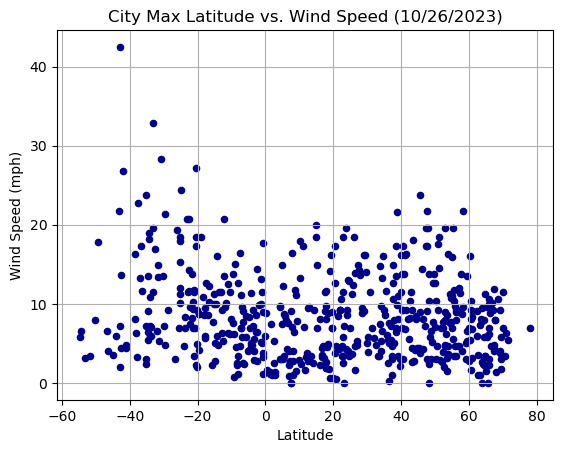

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed", c="DarkBlue", grid="axis grid lines")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (10/26/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


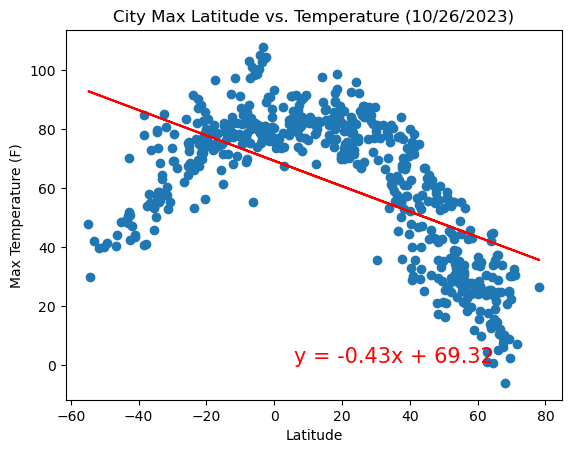

In [14]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Max Latitude vs. Temperature (10/26/2023)")
plt.show()

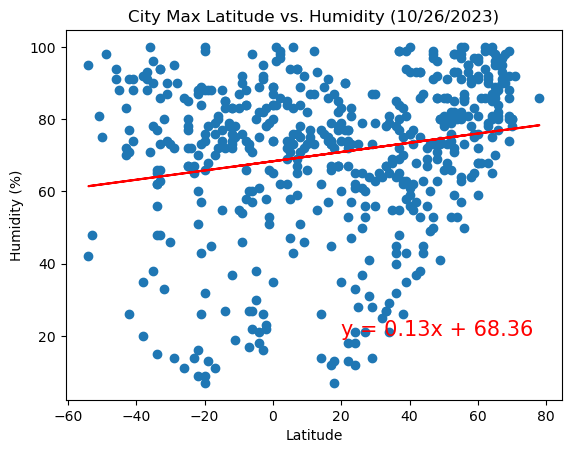

In [40]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (10/26/2023)")
plt.show()

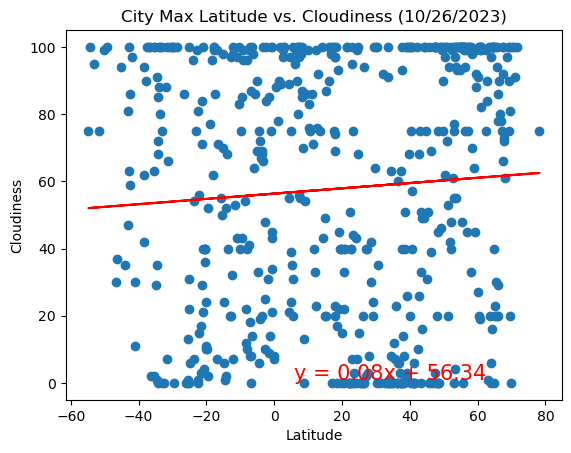

In [18]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness (10/26/2023)")
plt.show()

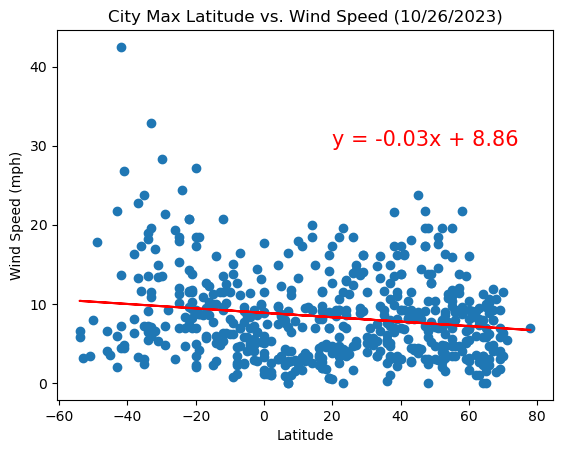

In [39]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Max Latitude vs. Wind Speed (10/26/2023)")
plt.show()

In [20]:
#Change Latitude datatype from string to integer
city_data_df["Lat"] = city_data_df["Lat"].astype(int)
print(city_data_df.dtypes)

City           object
Lat             int32
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57,-152.4072,45.91,93,100,13.80,US,1698509507
2,sawakin,19,37.3321,86.25,67,22,14.12,SD,1698509508
4,fortuna,40,-124.1573,40.12,100,40,9.22,US,1698509509
5,nova sintra,14,-24.7167,75.40,77,49,19.95,CV,1698509509
8,hasaki,35,140.8333,55.80,68,7,11.68,JP,1698509510


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43,-176.5597,48.81,83,35,5.99,NZ,1698509507
3,port-aux-francais,-49,70.2167,41.29,98,100,17.76,TF,1698509508
6,fale old settlement,-9,-171.2468,81.95,76,43,6.24,TK,1698509509
7,edinburgh of the seven seas,-37,-12.3116,58.06,91,100,13.22,SH,1698509510
10,grytviken,-54,-36.5092,29.86,95,100,6.55,GS,1698509511


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8773037449833285


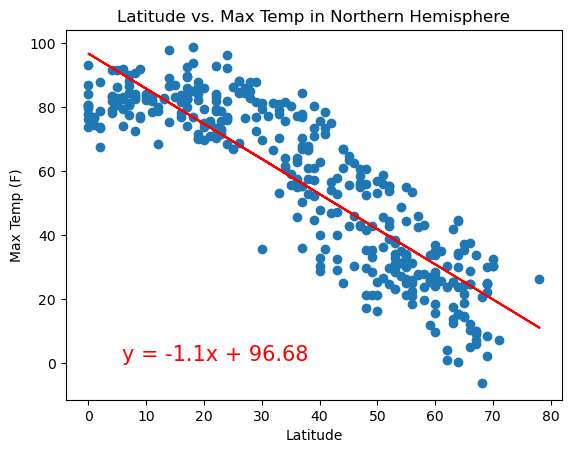

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values, y_values)[1]
print("The r-value is:",r_value[0])

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Latitude vs. Max Temp in Northern Hemisphere")
plt.show()

The r-value is: 0.7816433467162722


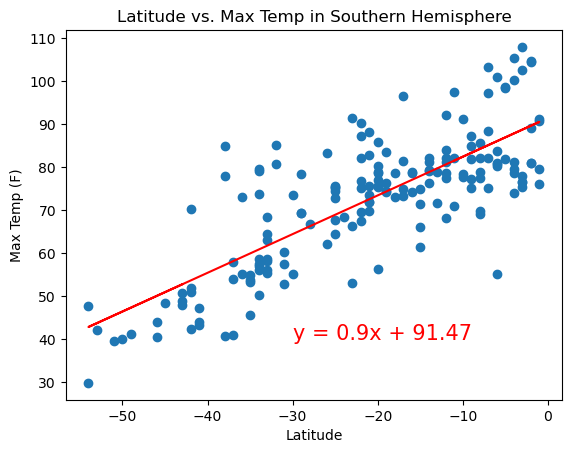

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values, y_values)[1]
print("The r-value is:",r_value[0])

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Latitude vs. Max Temp in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere the temperature decreases as the latitude is increasing showing a negative linear relationship.
In the Southern Hemisphere the temperature and latitude increase together showing a positive linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.26200076042727083


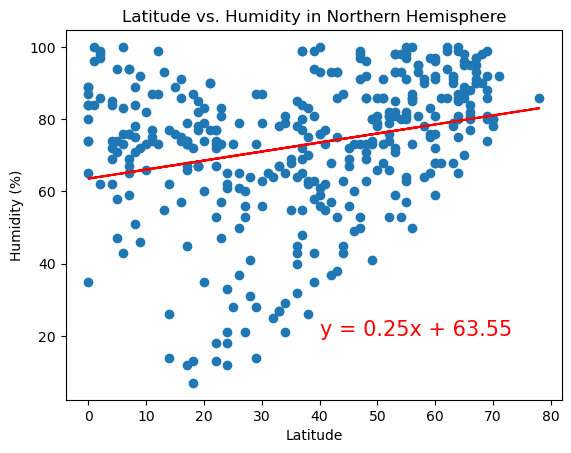

In [37]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value_northern = np.corrcoef(x_values_northern, y_values_northern)[1]
print("The r-value is:",r_value_northern[0])

plt.scatter(x_values_northern,y_values_northern)
plt.plot(x_values_northern,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity in Northern Hemisphere")
plt.show()

The r-value is: -0.1583316525949197


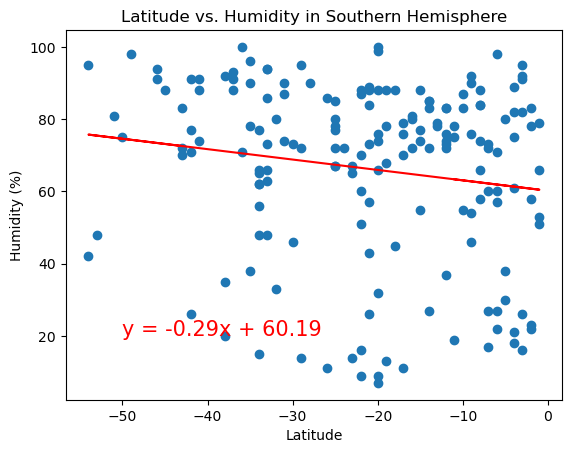

In [36]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values_southern, y_values_southern)[1]
print("The r-value is:", r_value[0])

plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

In the plots above it shows as the humidity increases in percent the latitude increases for both the northern and southern hemispheres causing a positive linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1272938929232845


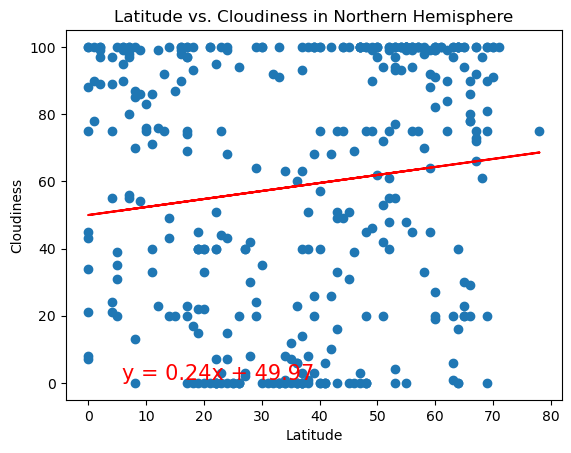

In [29]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value_northern = np.corrcoef(x_values_northern, y_values_northern)[1]
print("The r-value is:",r_value_northern[0])

plt.scatter(x_values_northern,y_values_northern)
plt.plot(x_values_northern,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")
plt.show()

The r-value is: -0.14263102305130113


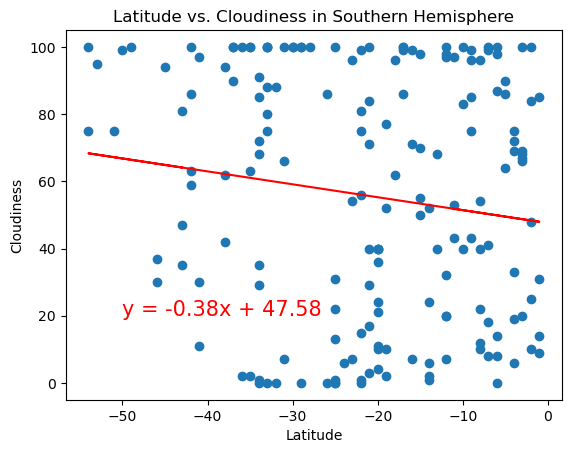

In [35]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values_southern, y_values_southern)[1]
print("The r-value is:", r_value[0])

plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

In the plots above it shows as the cloudiness increases in percent the latitude increases for both the northern and southern hemispheres causing a positive linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04504411400764496


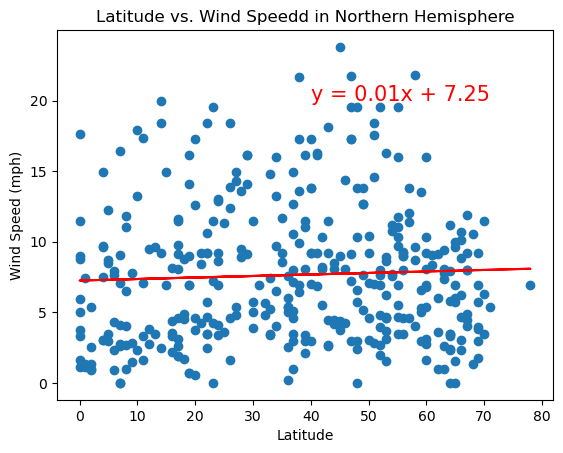

In [34]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value_northern = np.corrcoef(x_values_northern, y_values_northern)[1]
print("The r-value is:",r_value_northern[0])

plt.scatter(x_values_northern,y_values_northern)
plt.plot(x_values_northern,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speedd in Northern Hemisphere")
plt.show()

The r-value is: -0.20838044258929198


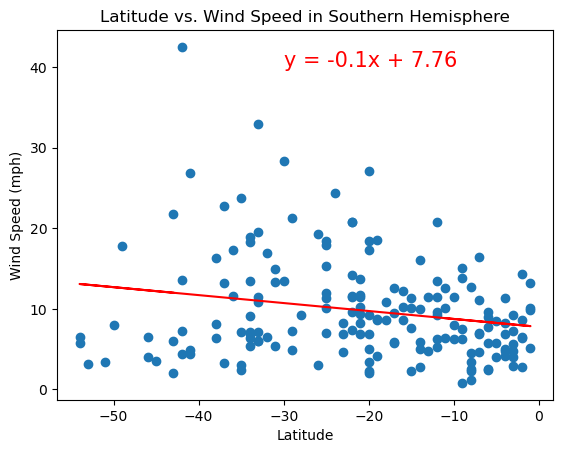

In [33]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values_southern, y_values_southern)[1]
print("The r-value is:", r_value[0])

plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Wind Speed in the Northern Hemisphere show a very small positive linear relationship showing slight wind speed increase as latitude increases; while the southern hemisphere shows a negative linear relationship with wind speeds decrease as latitude increases.